## TaskList 06: Exploratory Data Analysis - EDA


This 'tasklist' is going to be actually one open/free-form task. You'll be provided with a dataset, and your goal is to apply what you've learned about on Session06 (and previous sessions) to perform EDA on this dataset. There are no wrong answers here - you are going to look through the dataset provided, and offer insights you find relevant and interesting. In order to do so, you will use tables, cross-tables and various visualizations. And don't forget to describe your insights using text! 

In essence, the output of this tasklist should be in the form of an exploratory report on the dataset provided. 

The dataset in question is `rome_weekends.csv`. It is a dataset containing prices of Airbnb properties in Rome during the weekends, along with various additional data. It is a part of a larger dataset `Airbnb Prices in European Cities`, which can be found [here](https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities). 


The field names of this dataset may look a bit cryptical, so here's a brief description for each of them:

- `realSum` - The total price of the Airbnb listing
- `room_type` - The type of room being offered (e.g. private, shared, etc.)
- `room_shared` - Whether the room is shared or not
- `room_private` - Whether the room is private or not
- `person_capacity` - The maximum number of people that can stay in the room.
- `host_is_superhost` - Whether the host is a superhost or not -> __A Superhost is a host who goes above and beyond to provide excellent hospitality__.
- `multi` - Whether the listing is for multiple rooms or not
- `biz` - Whether the listing is for business purposes or not
- `cleanliness_rating` - The cleanliness rating of the listing
- `guest_satisfaction_overall` - The overall guest satisfaction rating of the listing
- `bedrooms` - The number of bedrooms in the listing
- `dist` - The distance from the city centre
- `metro_dist` - The distance from the nearest metro station
- `lng` - The longitude of the listing
- `lat` - The latitude of the listing

### Preparation

Before embarking on this explorations, let's make some first necessary steps.

First, import all the Python libraries you are going to use during your EDA.

In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



Next, load `rome_weekends.csv` dataset from the `_data` folder.

In [2]:
work_dir = os.getcwd()
print(work_dir)
data_dir = os.path.join(work_dir,'_data')
print(data_dir)

c:\Users\Admin\dss03Python\PY\Python06
c:\Users\Admin\dss03Python\PY\Python06\_data


In [3]:
file_path = os.path.join(work_dir, data_dir,'rome_weekends.csv')
data_set = pd.read_csv(file_path)
display(data_set.head(5))

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,172.772543,Private room,False,True,2.0,False,0,0,10.0,93.0,1,1.222582,0.397760,550.078435,12.187232,1075.412107,23.430621,12.50181,41.88987
1,1,156.874664,Private room,False,True,2.0,True,1,0,10.0,95.0,1,2.978482,1.595742,281.162756,6.229285,697.725034,15.201736,12.48654,41.92498
2,2,195.917986,Private room,False,True,2.0,False,1,0,9.0,80.0,1,0.935379,0.649273,482.708059,10.694611,1251.514249,27.267459,12.49627,41.90801
3,3,298.552825,Entire home/apt,False,False,4.0,False,0,1,9.0,90.0,1,2.203023,0.494699,691.716421,15.325284,1625.911297,35.424663,12.47700,41.90700
4,4,131.391298,Private room,False,True,3.0,False,1,0,9.0,91.0,1,1.295984,0.867473,317.074092,7.024917,836.616071,18.227835,12.51544,41.89463


### EDA

In [4]:
df = data_set

In [65]:
(df.isna()
 .sum()
 .reset_index()
 .rename(columns={'index': 'feature', 0: 'no_nulls'})
 .sort_values('no_nulls', ascending=False))




,feature,no_nulls
0,realSum,0
1,room_type,0
2,room_shared,0
3,room_private,0
4,person_capacity,0
5,host_is_superhost,0
6,cleanliness_rating,0
7,guest_satisfaction_overall,0
8,bedrooms,0
9,dist,0


In [6]:
df.isna()
df.isna().any()

Unnamed: 0                    False
realSum                       False
room_type                     False
room_shared                   False
room_private                  False
person_capacity               False
host_is_superhost             False
multi                         False
biz                           False
cleanliness_rating            False
guest_satisfaction_overall    False
bedrooms                      False
dist                          False
metro_dist                    False
attr_index                    False
attr_index_norm               False
rest_index                    False
rest_index_norm               False
lng                           False
lat                           False
dtype: bool

### There seems to be no Nan or none values in this data set, which is great.

Lets check every data type in our data set.

In [7]:
print(df.dtypes)

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object


First of all, Lets drop the `Unnamed` columns which contains no information. Probably is here after reseting the index previously.

In [8]:
print(df.dtypes)
df = df.drop(columns=['Unnamed: 0'])

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object


Now we only have columns that contain useful information.

I am looking for a columns that:

### 1) Should be a __string__ but are stored as a number `int64, float64` and those are:

- ZIP codes

- phone numbers

- IDs

### 2) Should be a __categorical__ data but are stored as a string

- Gender

- Yes/No responses

- or small sets that should be converted to category (number of flight, number of licence etc.)

After inspecting the data, I noticed that column `room_type` should be a string, since it can be __private__, __shared__ etc.

I will convert it into string.

In [9]:
print(df['room_type'].dtype) # Object

object


In [10]:
df['room_type'] = df['room_type'].astype('string')


What about `bool` columns? The columns which contain Yes/No. They are all categorical and it will be beneficial to convert them into category.

In [11]:
for col in ['room_shared', 'room_private', 'host_is_superhost']:
    df[col] = df[col].astype('category')

Also, after checking `lng` and `lat`, seems that these 2 columns are not needed in our analysis (since i am not inspecting the geo-spatial data of this data set) and I will drop them as well.

In [12]:
df = df.drop(columns=['lng','lat'])

### Columns `biz` and `multi` seems to be just a binary indicators. and are not relevant for my analysis. I do not think at least they are, so i will drop them as well.

In [13]:
print(df['multi'].value_counts())

df = df.drop(columns=['multi','biz'])

multi
0    2788
1    1747
Name: count, dtype: int64


Now the data is cleaned from the unnecessary columns.

In [14]:

print(df.dtypes)

realSum                              float64
room_type                     string[python]
room_shared                         category
room_private                        category
person_capacity                      float64
host_is_superhost                   category
cleanliness_rating                   float64
guest_satisfaction_overall           float64
bedrooms                               int64
dist                                 float64
metro_dist                           float64
attr_index                           float64
attr_index_norm                      float64
rest_index                           float64
rest_index_norm                      float64
dtype: object


In [15]:
print(df.select_dtypes('int64').head())

   bedrooms
0         1
1         1
2         1
3         1
4         1


In [16]:
print(df.select_dtypes('category').head())

  room_shared room_private host_is_superhost
0       False         True             False
1       False         True              True
2       False         True             False
3       False        False             False
4       False         True             False


In [17]:
df.head()
df = df.astype({'person_capacity': 'int64'}) #Because there can't be 2.5 persons, right?
df.head()


,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm
0,172.772543,Private room,False,True,2,False,10.0,93.0,1,1.222582,0.397760,550.078435,12.187232,1075.412107,23.430621
1,156.874664,Private room,False,True,2,True,10.0,95.0,1,2.978482,1.595742,281.162756,6.229285,697.725034,15.201736
2,195.917986,Private room,False,True,2,False,9.0,80.0,1,0.935379,0.649273,482.708059,10.694611,1251.514249,27.267459
3,298.552825,Entire home/apt,False,False,4,False,9.0,90.0,1,2.203023,0.494699,691.716421,15.325284,1625.911297,35.424663
4,131.391298,Private room,False,True,3,False,9.0,91.0,1,1.295984,0.867473,317.074092,7.024917,836.616071,18.227835


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4535 entries, 0 to 4534
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   realSum                     4535 non-null   float64 
 1   room_type                   4535 non-null   string  
 2   room_shared                 4535 non-null   category
 3   room_private                4535 non-null   category
 4   person_capacity             4535 non-null   int64   
 5   host_is_superhost           4535 non-null   category
 6   cleanliness_rating          4535 non-null   float64 
 7   guest_satisfaction_overall  4535 non-null   float64 
 8   bedrooms                    4535 non-null   int64   
 9   dist                        4535 non-null   float64 
 10  metro_dist                  4535 non-null   float64 
 11  attr_index                  4535 non-null   float64 
 12  attr_index_norm             4535 non-null   float64 
 13  rest_index        

It's good to check if there are some duplicates.

With method, `duplicated()` + `any()` we would receive __True__ if only 1 column was duplicated

In [19]:
df.duplicated().any()

#False, thats good.

False

In [20]:
df.reset_index(drop=True)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm
0,172.772543,Private room,False,True,2,False,10.0,93.0,1,1.222582,0.397760,550.078435,12.187232,1075.412107,23.430621
1,156.874664,Private room,False,True,2,True,10.0,95.0,1,2.978482,1.595742,281.162756,6.229285,697.725034,15.201736
2,195.917986,Private room,False,True,2,False,9.0,80.0,1,0.935379,0.649273,482.708059,10.694611,1251.514249,27.267459
3,298.552825,Entire home/apt,False,False,4,False,9.0,90.0,1,2.203023,0.494699,691.716421,15.325284,1625.911297,35.424663
4,131.391298,Private room,False,True,3,False,9.0,91.0,1,1.295984,0.867473,317.074092,7.024917,836.616071,18.227835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4530,413.812452,Entire home/apt,False,False,4,False,10.0,97.0,1,1.933569,0.270592,657.307139,14.562931,1408.407648,30.685786
4531,582.376733,Entire home/apt,False,False,6,True,10.0,96.0,2,3.124166,1.939505,540.341368,11.971503,1985.435361,43.257820
4532,878.591635,Entire home/apt,False,False,6,True,10.0,99.0,3,2.759242,1.195339,759.369097,16.824159,1783.268631,38.853097
4533,447.244757,Entire home/apt,False,False,4,True,10.0,98.0,1,1.641598,0.858837,1125.857244,24.943866,1687.895816,36.775155


After I finished with `data cleaning` (i think so at least), I will try to analyise the data set from the begining and provide the insights , and parallels in the data and also visualize the main point and correlations.

#### 1. Lets check the price of all the apartments that are < 1 km away from the city center. have a superhost and guest satisfaction score > 90.

In [21]:
df = df.loc[(df['dist']<1.0) & (df['host_is_superhost']==True) & (df['guest_satisfaction_overall']>90)]

In [22]:
display(df.head(15))

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm
162,119.935473,Private room,False,True,2,True,10.0,96.0,1,0.486947,0.292188,472.286143,10.463709,1076.847550,23.461896
165,126.715451,Private room,False,True,2,True,10.0,96.0,1,0.166000,0.311629,503.532872,11.155994,1168.974781,25.469125
171,126.715451,Private room,False,True,3,True,10.0,97.0,1,0.261542,0.405209,489.338000,10.841500,1130.921188,24.640029
207,155.471910,Entire home/apt,False,False,2,True,9.0,96.0,1,0.626102,0.310795,672.528862,14.900175,1592.182231,34.689788
215,122.273397,Private room,False,True,2,True,10.0,98.0,1,0.604491,0.460855,730.329603,16.180776,1375.239917,29.963141
328,246.650925,Private room,False,True,3,True,9.0,93.0,1,0.208845,0.305399,545.086220,12.076627,1291.030742,28.128428
369,320.529306,Entire home/apt,False,False,4,True,9.0,93.0,1,0.898881,0.126065,784.526254,17.381527,1754.276498,38.221429
372,161.550511,Private room,False,True,2,True,10.0,94.0,1,0.739080,0.250442,436.553858,9.672044,1041.272905,22.686810
382,201.762794,Entire home/apt,False,False,4,True,10.0,97.0,1,0.421129,0.328996,478.891869,10.610062,1334.069988,29.066149
385,103.803801,Private room,False,True,2,True,10.0,95.0,1,0.541466,0.249407,572.037759,12.673750,1270.153176,27.673556


#### 2. I wanted to check the relationship between price and distance from the city center.

In [23]:
df['dist'].max() # 0.99 ~ 1 km
df['dist'].min() # 0.074962954027264 ~ 0.07 km
df['dist'].mean() # 0.66 km

0.660022062451602

In [24]:
pd.crosstab(index = df['realSum'], columns = df['dist'])

# zasto je ovde ovoliko nula?

dist,0.074963,0.166000,0.192069,0.192081,0.202794,0.208844,0.208845,0.257616,0.261542,0.280867,...,0.952158,0.973635,0.974461,0.982092,0.990633,0.990635,0.991175,0.995601,0.996241,0.997295
realSum,,,,,,,,,,,,,,,,,,,,,
92.347977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103.803801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104.037594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115.727211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119.935473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320.529306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327.075492,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368.690529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


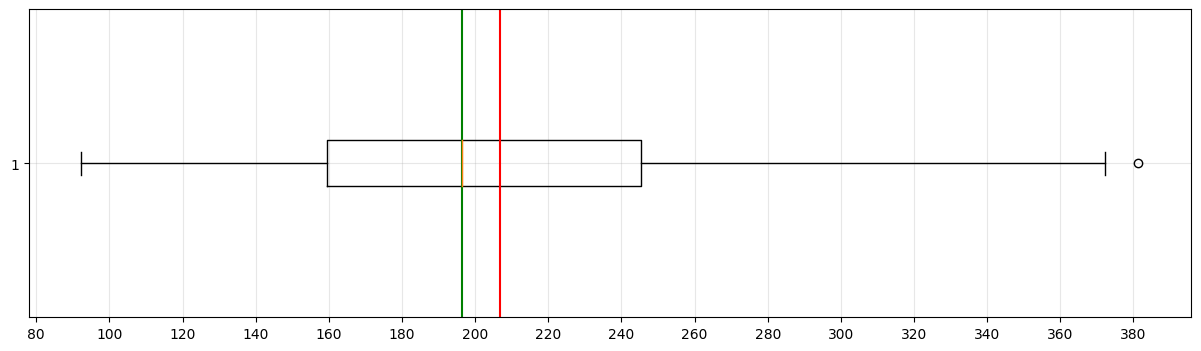

In [25]:
fig,ax= plt.subplots(figsize=(15,4))
ax.boxplot(df['realSum'],vert=False)
ax.set_xticks(np.arange(0,df['realSum'].mean()+305,20))
ax.grid(alpha=.3)
ymin,ymax = ax.get_ylim()
ax.vlines(x = df['realSum'].mean(), ymin=ymin, ymax=ymax, color='red', label='mean')
ax.vlines(x = df['realSum'].median(), ymin=ymin, ymax=ymax, color='green', label ='median')

#### 3. Based on the boxplot above we can see that:

- Mean value (red) is in the third quartile of the data indicating that the average salary for the apartment is towards the higher end of the data.

- Median value(green) is about 195 on the x axis.

- Outlier (high) is at 380+ 

- No low end outliers in this data.

### 4. Lets Check how the total price varies across room types (e.g., private, shared, etc.)

-  Room type likely affects the price significantly.

In [26]:
room_type_crosstab = pd.crosstab(index= df['room_type'], columns='mean_price',values=df['realSum'],aggfunc='mean')
print(room_type_crosstab)

col_0            mean_price
room_type                  
Entire home/apt  233.150407
Private room     175.685596


C:\Users\Admin\AppData\Local\Temp\ipykernel_4496\1079662807.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='room_type', y='realSum', data=df, palette='Blues_d')


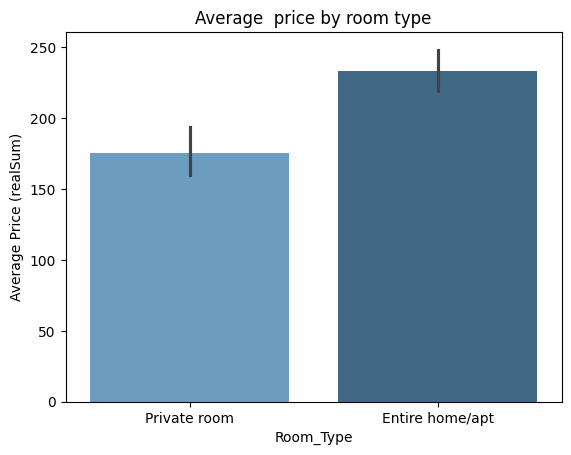

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='room_type', y='realSum', data=df, palette='Blues_d')
plt.title('Average  price by room type')
plt.xlabel('Room_Type')
plt.ylabel('Average Price (realSum)')
plt.show()


### 5. realSum vs. person_capacity

- How does person capacity affact the mean price of the apartments? Lets find out: 

In [28]:
person_crosstab = pd.crosstab(index=df['person_capacity'],columns='mean_sum', values=df['realSum'], aggfunc='mean'),
print(person_crosstab)



(col_0              mean_sum
person_capacity            
2                170.115812
3                209.833713
4                235.234065
5                259.977088
6                268.666371,)


C:\Users\Admin\AppData\Local\Temp\ipykernel_4496\3374800580.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='person_capacity', y='realSum', data=df, palette='Reds_d')


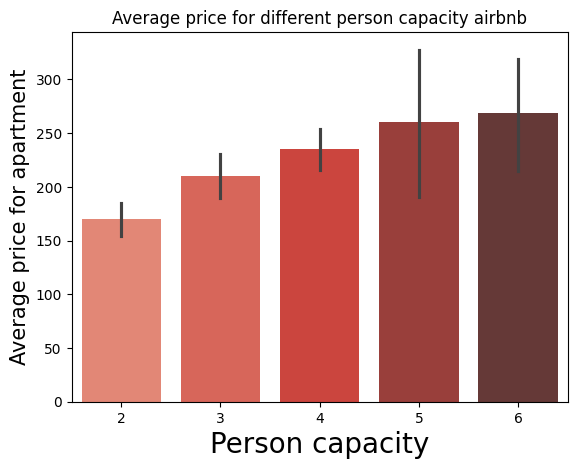

In [29]:
sns.barplot(x='person_capacity', y='realSum', data=df, palette='Reds_d')
plt.title('Average price for different person capacity airbnb')
plt.xlabel('Person capacity', size=20)
plt.ylabel('Average price for apartment',size= 15)
plt.show()

It is clearly shown that apartments with 6 people capacity have the highest cost among all listed which was expected.

### 6. I am very curious (from the start) for the relationship between distance from the city center and the average price.



In [30]:
ddf_distance = pd.crosstab(index=df['dist'], columns='mean_sum', values=df['realSum'],dropna=True, aggfunc='mean' )
print(ddf_distance)

col_0       mean_sum
dist                
0.074963  235.896477
0.166000  126.715451
0.192069  259.275711
0.192081  327.075492
0.202794  286.629416
...              ...
0.990635  173.473920
0.991175  242.208870
0.995601  182.591822
0.996241  145.185047
0.997295  196.385570

[109 rows x 1 columns]


In [31]:
ddf_distance = pd.crosstab(index=df['dist'], columns='mean_sum', values=df['realSum'].where(~(df['realSum']<350)),dropna=True, aggfunc='mean' )
print(ddf_distance)

col_0       mean_sum
dist                
0.322535  368.690529
0.761992  381.315316
0.952158  372.197414


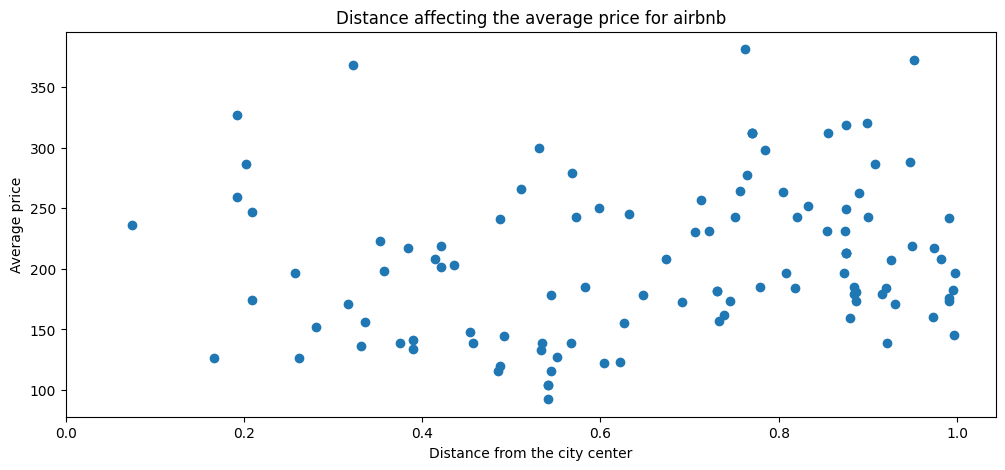

In [32]:
plt.figure(figsize=(12,5))
plt.scatter(x=df['dist'],y=df['realSum'])
plt.title('Distance affecting the average price for airbnb')
plt.xticks(np.arange(0,1.2,0.2))
plt.xlabel('Distance from the city center')
plt.ylabel('Average price')
plt.show()

### We can notice the outlier in the scatterplot. We have one marker at ~0.35km, one marker at ~0.7km and marker at ~0.85km.


I will try to find these data by just applying a filter in previous `pd.crosstab()`.

In [33]:
ddf_distance = pd.crosstab(index=df['dist'].round(6), columns='mean_sum', values=df['realSum'].where(~(df['realSum']<350)),dropna=True, aggfunc='mean' )
print(ddf_distance)


# .where - obvious

# ~ - 'is not'

# <350.

col_0       mean_sum
dist                
0.322535  368.690529
0.761992  381.315316
0.952158  372.197414


Now we have have these 3 markers that are outiler in our scatterplot.

### Filtering the outliers.

- Check every type of data for these distances.

In [34]:
outliers = df[df['dist'].isin([0.322535, 0.761992, 0.952158])]
print(outliers[['realSum', 'dist', 'room_type', 'cleanliness_rating', 'guest_satisfaction_overall']])


Empty DataFrame
Columns: [realSum, dist, room_type, cleanliness_rating, guest_satisfaction_overall]
Index: []


### Error message:

Empty DataFrame

Columns: [realSum, dist, room_type, cleanliness_rating, guest_satisfaction_overall]

Index: []

- likely to happen because of floating point number. I will try to round it first and then try again.

In [35]:
df['dist'] = df['dist'].round(6)

In [36]:
df['dist'].round(6)

outliers = df[df['dist'].isin([0.322535, 0.761992, 0.952158])]
print(outliers[['realSum', 'dist', 'room_type', 'cleanliness_rating', 'guest_satisfaction_overall']])


         realSum      dist        room_type  cleanliness_rating  \
1595  368.690529  0.322535  Entire home/apt                10.0   
2650  381.315316  0.761992  Entire home/apt                 9.0   
3819  372.197414  0.952158  Entire home/apt                 9.0   

      guest_satisfaction_overall  
1595                        98.0  
2650                        96.0  
3819                        94.0  


#### Lets highlight the outliers with a scatterplot and compare to all listings.

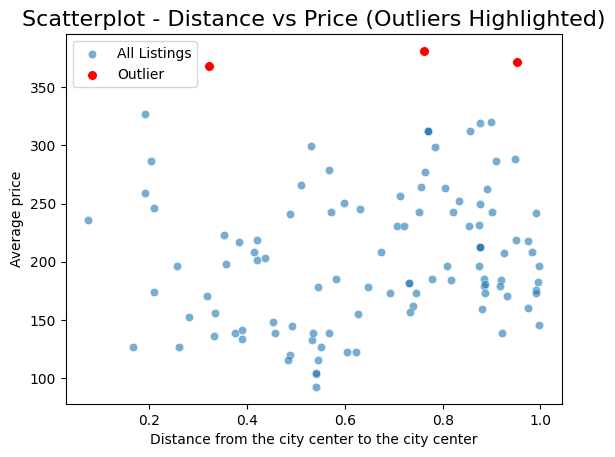

In [37]:
plt.Figure(figsize=(15,4))
sns.scatterplot(x=df['dist'], y=df['realSum'], label='All Listings', alpha=0.6)
sns.scatterplot(x=outliers['dist'], y=outliers['realSum'], color='red', label='Outlier', s=50)
plt.title('Scatterplot - Distance vs Price (Outliers Highlighted)', size=16)
plt.xlabel('Distance from the city center to the city center')
plt.ylabel('Average price')
plt.legend(loc='upper left')
plt.show()


### 

Compare distributions of ratings	Boxplot

Explore correlations between variables	Heatmap

Visualize multiple relationships	Pair Plot

Highlight specific outliers	Scatter Plot with different markers/colors

<Axes: xlabel='dist', ylabel='Count'>

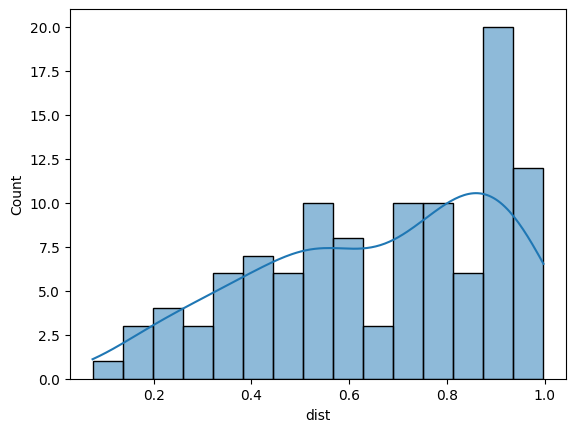

In [38]:
sns.histplot(df['dist'],bins=15,kde=True)

                             realSum  person_capacity  cleanliness_rating  \
realSum                     1.000000         0.522929           -0.214325   
person_capacity             0.522929         1.000000           -0.185925   
cleanliness_rating         -0.214325        -0.185925            1.000000   
guest_satisfaction_overall  0.012987        -0.004240            0.274827   
bedrooms                    0.356117         0.588864           -0.091167   
dist                        0.177797         0.119064            0.025075   
metro_dist                  0.016989         0.006365            0.171584   
attr_index                  0.311446         0.039594           -0.164861   
attr_index_norm             0.311446         0.039594           -0.164861   
rest_index                  0.395018         0.109643           -0.157808   
rest_index_norm             0.395018         0.109643           -0.157808   

                            guest_satisfaction_overall  bedrooms      dist 

<Axes: >

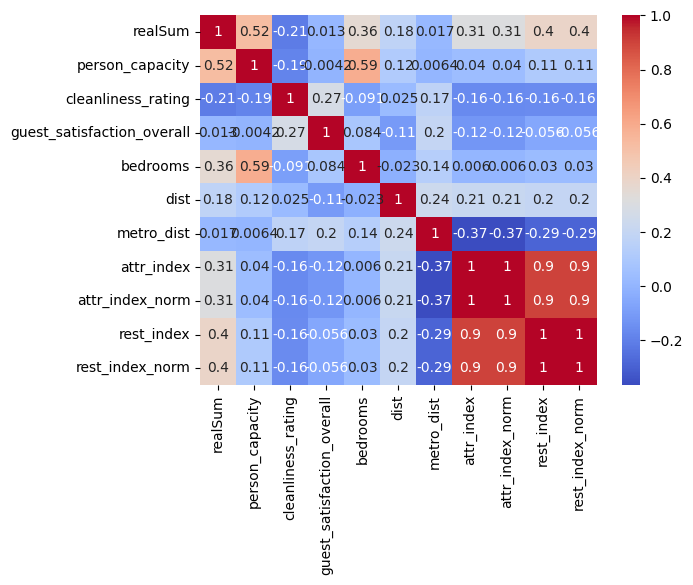

In [39]:
df.corr(numeric_only=True)
print(df.corr(numeric_only=True))

sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm',annot=True)

### The `.corr()` method calculates Pearson correlation coefficients for all numerical columns.

The correlation coefficient measures the strength and direction of a linear relationship between two variables, ranging from -1 to 1:

- +1: Perfect positive correlation (as one variable increases, the other also increases proportionally).

- -1: Perfect negative correlation (as one variable increases, the other decreases proportionally).

- 0: No linear correlation.

***

### My target variable is __`realSum`__
Lets take a look at the data and try to analyze the relationship between the variable and some other variable (that i found interesting).

#### 1.     person_capacity(0.52)

0.52 value shows the positive correlation, which means that increased person capacity contribute to increased price of the apartment.

#### 2. cleanliness_rating(-0.21)  

-0.21 shows negative correlation. This means that cleaner listing do not have strictly higher prices.

#### 3.  bedroom(0.36)

Moderate correlation, more bedrooms are associated with higher prices.

#### **4.** dist(0.18)

I consider 0.18 as a weak correlation which does not mean that closer apartments to city center have higher price.

***

### **7.** Visually represent guest overall ratings while using the boxplot

#### 7a) The boxplot 
#### 7b) the stripplot
#### Here I choose `cleanliness_rating` after looking at the heatmap because,
#### I noticed it has the strongest positive correlation with the `guest_satisfaction_overall`.

<Axes: xlabel='cleanliness_rating', ylabel='guest_satisfaction_overall'>

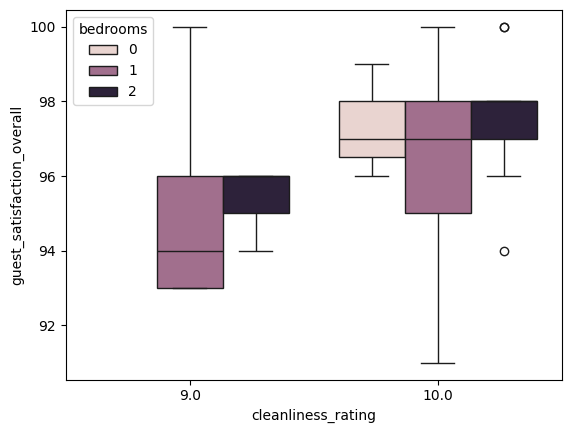

In [ ]:

sns.boxplot(y='guest_satisfaction_overall', x='cleanliness_rating',hue='bedrooms', data=df)

Now the:  7b) `stripplot()`

<Axes: xlabel='cleanliness_rating', ylabel='guest_satisfaction_overall'>

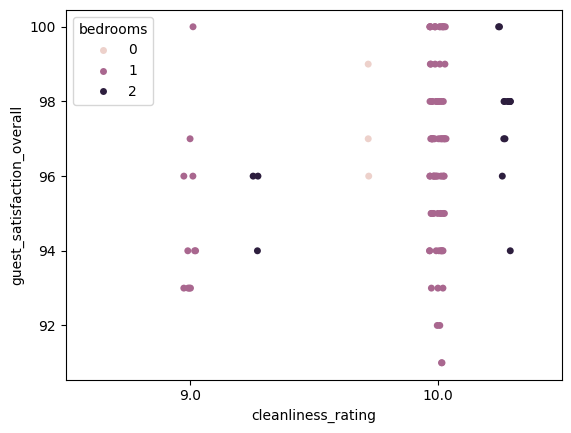

In [70]:
sns.stripplot(y='guest_satisfaction_overall', x='cleanliness_rating',hue='bedrooms', data=df, dodge=True)

#### 8. Visualize multiple relationships:	`Pair Plot`


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


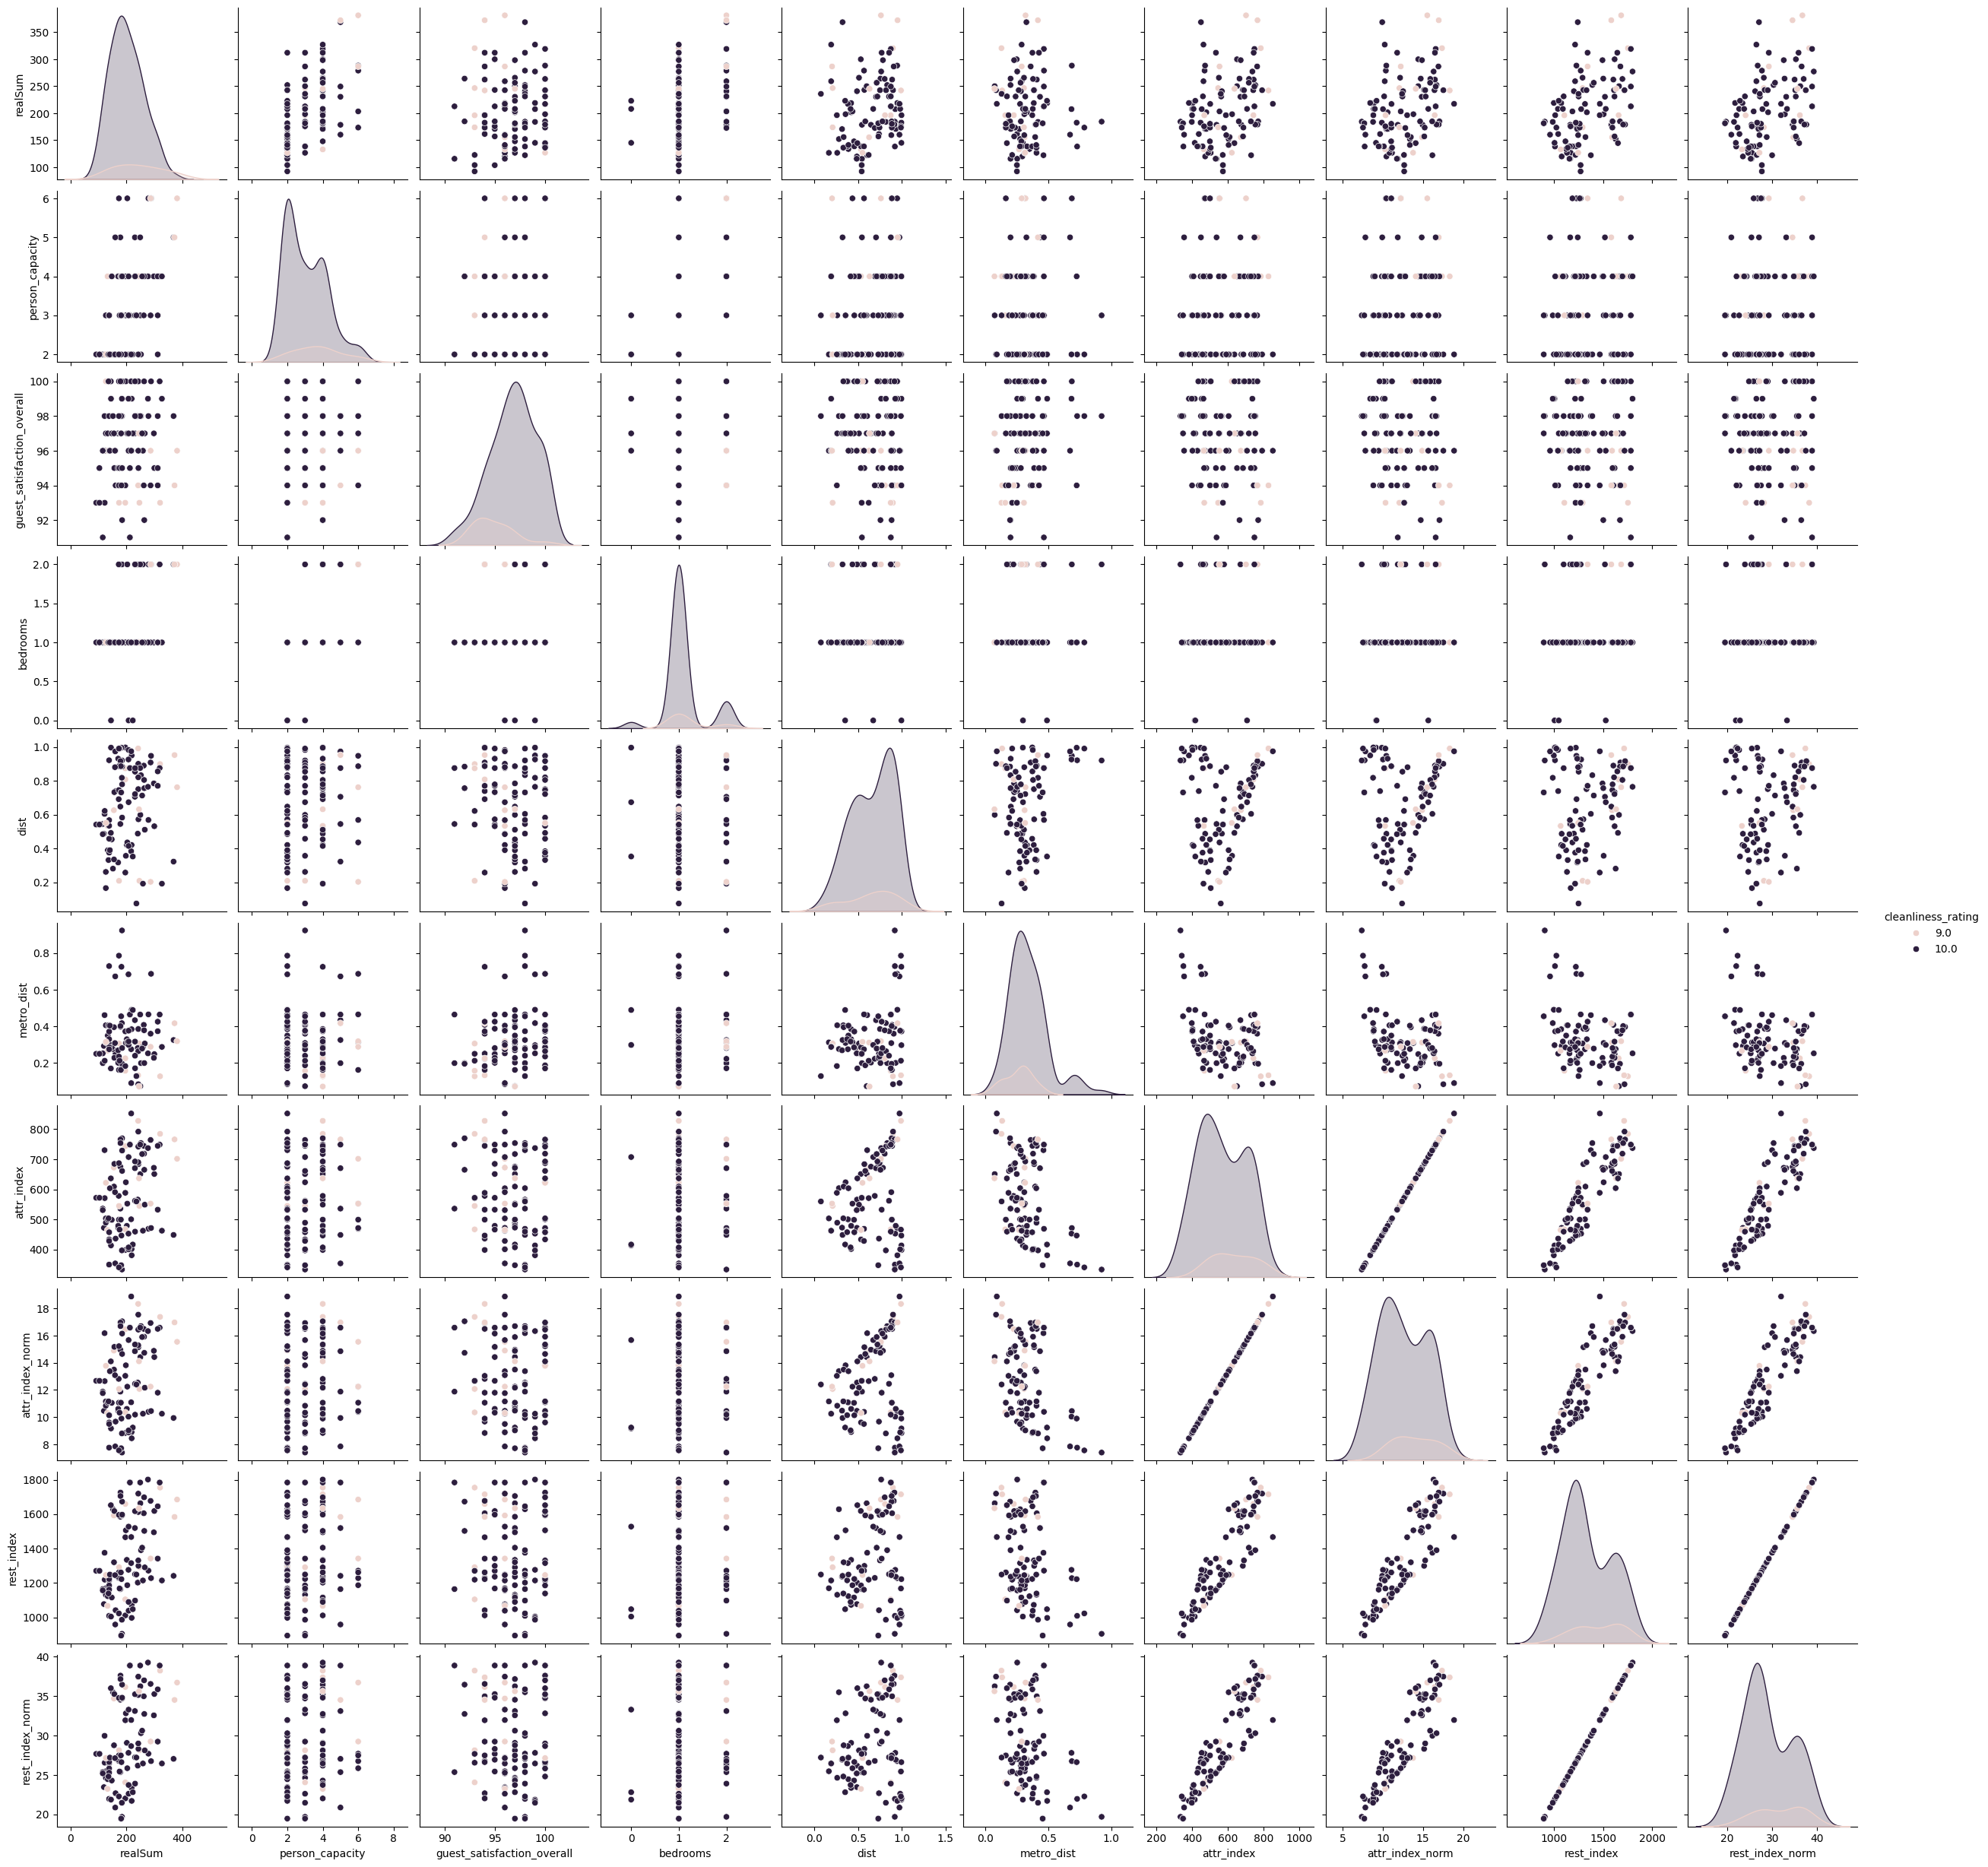

In [82]:
sns.pairplot(df.select_dtypes(['number']),hue='cleanliness_rating')

x
(1, 2, 3, 4, 5, 6, 7, 8)


TypeError: can only concatenate tuple (not "int") to tuple